In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('dataset/output.csv')

df['lat']=(df['lat']-df['lat'].min())/(df['lat'].max()-df['lat'].min())
df['lng']=(df['lng']-df['lng'].min())/(df['lng'].max()-df['lng'].min())
df['Transactions']=(df['Transactions']-df['Transactions'].min())/(df['Transactions'].max()-df['Transactions'].min())

df.head(5)

,Tenure,Sqft,Price,Transactions,Township,Bungalow,ClusterHouse,SemiDetached,TerracedHouse,Condominium,Flat,Hostel,TownHouse,lat,lng
0,FREEHOLD,312.34,765000.00,0.00,BARAT_DAYA,0,0,0,0,0,0,1,0,0.08,0.99
1,FREEHOLD,443.46,883440.00,0.01,BARAT_DAYA,0,0,0,0,0,1,1,0,0.08,0.99
2,FREEHOLD,427.70,519000.00,0.00,SEBERANG_PERAI_SELATAN,0,0,0,0,0,0,1,0,0.08,0.99
3,FREEHOLD,426.96,470500.00,0.00,SEBERANG_PERAI_SELATAN,0,0,0,0,0,0,1,0,0.08,0.99
4,FREEHOLD,295.27,838800.00,0.00,SEBERANG_PERAI_SELATAN,0,0,0,0,0,0,1,0,0.08,0.99


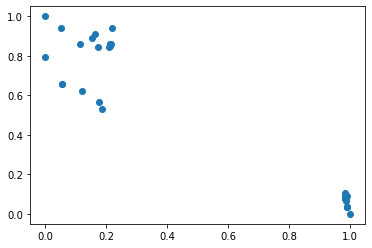

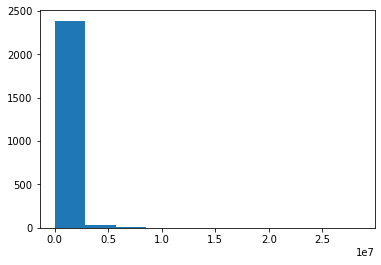

In [2]:
import matplotlib.pyplot as plt

plt.scatter(x=df['lng'], y=df['lat'])
plt.show()

# histogram plot
pyplot.hist(df["Price"])
pyplot.show()

In [3]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(df['lng']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

z_scores = np.abs(stats.zscore(df['lat']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2)
df = df[filtered_entries]

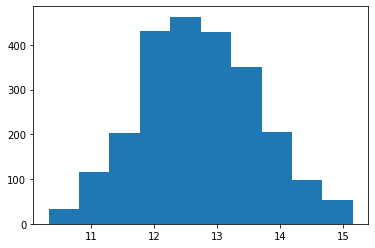

In [4]:
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from scipy import stats

df["Sqft"] = np.log(df["Sqft"])
df["Price"] = np.log(df["Price"])

z_scores = np.abs(stats.zscore(df['Price']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.5)
df = df[filtered_entries]

pyplot.hist(df["Price"])
pyplot.show()

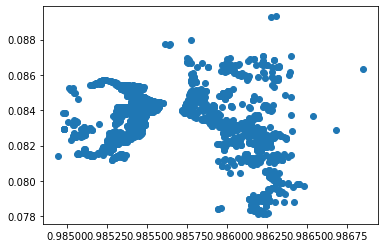

In [5]:
plt.scatter(x=df['lng'], y=df['lat'])
plt.show()

In [6]:
features = pd.get_dummies(df['Township'])
df = pd.concat([df, features], axis=1)
df = df.drop(df.columns[4], axis=1)

features = pd.get_dummies(df['Tenure'])
df = pd.concat([df, features], axis=1)
df = df.drop(df.columns[0], axis=1)

df.head(5)

,Sqft,Price,Transactions,Bungalow,ClusterHouse,SemiDetached,TerracedHouse,Condominium,Flat,Hostel,TownHouse,lat,lng,BARAT_DAYA,SEBERANG_PERAI_SELATAN,SEBERANG_PERAI_TENGAH,SEBERANG_PERAI_UTARA,TIMUR_LAUT,FREEHOLD,LEASEHOLD
0,5.74,13.55,0.00,0,0,0,0,0,0,1,0,0.08,0.99,1,0,0,0,0,1,0
1,6.09,13.69,0.01,0,0,0,0,0,1,1,0,0.08,0.99,1,0,0,0,0,1,0
2,6.06,13.16,0.00,0,0,0,0,0,0,1,0,0.08,0.99,0,1,0,0,0,1,0
3,6.06,13.06,0.00,0,0,0,0,0,0,1,0,0.08,0.99,0,1,0,0,0,1,0
4,5.69,13.64,0.00,0,0,0,0,0,0,1,0,0.08,0.99,0,1,0,0,0,1,0


<AxesSubplot:>

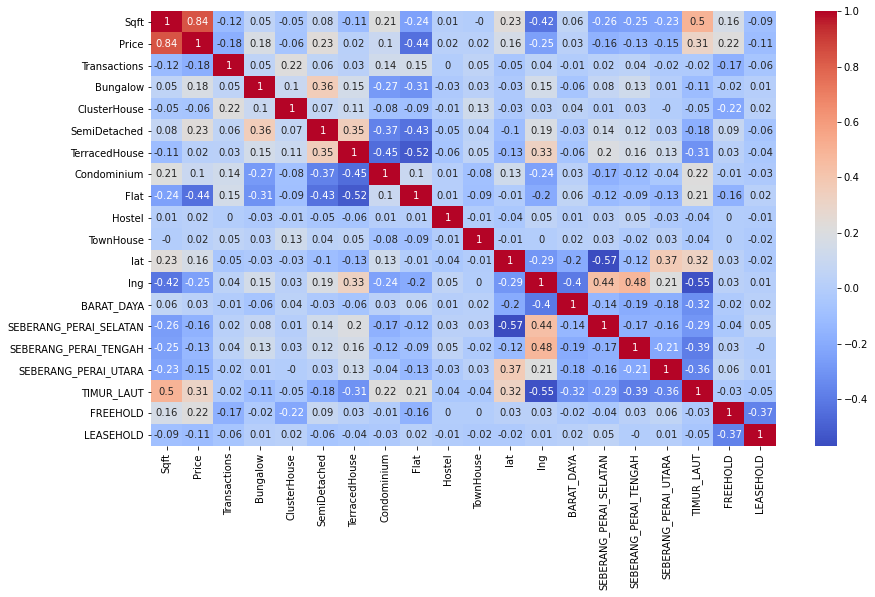

In [7]:
import seaborn as sns
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='coolwarm',annot=True)
# ideally need to select those features that are highly correlated with our dependent variable (Price)

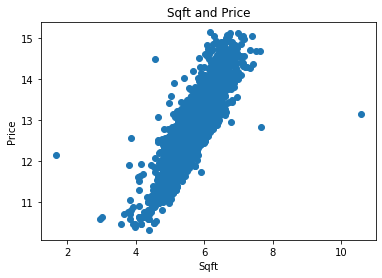

In [8]:
plt.scatter(x=df['Sqft'], y=df['Price'])
plt.title("Sqft and Price")
plt.xlabel("Sqft")
plt.ylabel("Price")
plt.show()

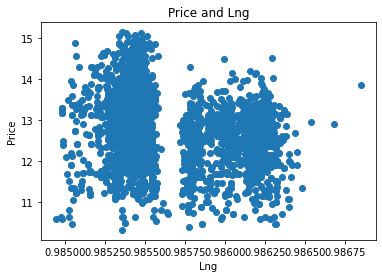

In [9]:
plt.scatter(x=df['lng'], y=df["Price"])
plt.title("Price and Lng")
plt.xlabel("Lng")
plt.ylabel("Price")
plt.show()

In [10]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
y = np.array(df['Price'])
X = df.drop('Price', axis = 1)

train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [11]:
from numpy import absolute, mean, std
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)
scores = (-cross_val_score(reg, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1))
print('RMSE: %.2f (%.2f)' % (mean(scores), std(scores)))

reg.fit(train_features,train_labels)
r2 = reg.score(test_features,test_labels) # residual sum of squares ((y_true - y_pred)** 2) (R² score)
print('R2:', r2)

predictions = reg.predict(test_features)
out_pred = pd.DataFrame({"actual":np.exp(test_labels),"pred_lr":np.exp(predictions)})

RMSE: 0.43 (0.05)
R2: 0.8357924037208455


In [12]:
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

lasso = Lasso()

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=24)

# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define search
search = GridSearchCV(lasso, grid, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)
# summarize
print('RMSE: %.3f' % -results.best_score_) #average mean absolute error (MAE)
print('Config: %s' % results.best_params_)

RMSE: 0.431
Config: {'alpha': 0.0}


/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/aishapeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 217.58307700610044, tolerance: 0.20234743715568085
  model = cd_fast.enet_coordinate_descent(


In [13]:
from sklearn import ensemble

clf = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 4, min_samples_split = 2,
          learning_rate = 0.01, loss = 'ls')
scores = (-cross_val_score(clf, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1))
print('RMSE: %.2f (%.2f)' % (mean(scores), std(scores)))

clf.fit(train_features, train_labels)
r2 = (clf.score(test_features,test_labels))
print('R2:', r2)

predictions = clf.predict(test_features)
out_pred["pred_gbm"] = np.exp(predictions)

RMSE: 0.38 (0.03)
R2: 0.851061962745069


In [14]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 4)

scores = (-cross_val_score(dt, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1))
print('RMSE: %.2f (%.2f)' % (mean(scores), std(scores)))

dt.fit(train_features, train_labels)
r2 = (dt.score(test_features,test_labels))
print('R2:', r2)

RMSE: 0.43 (0.03)
R2: 0.8099629614573847


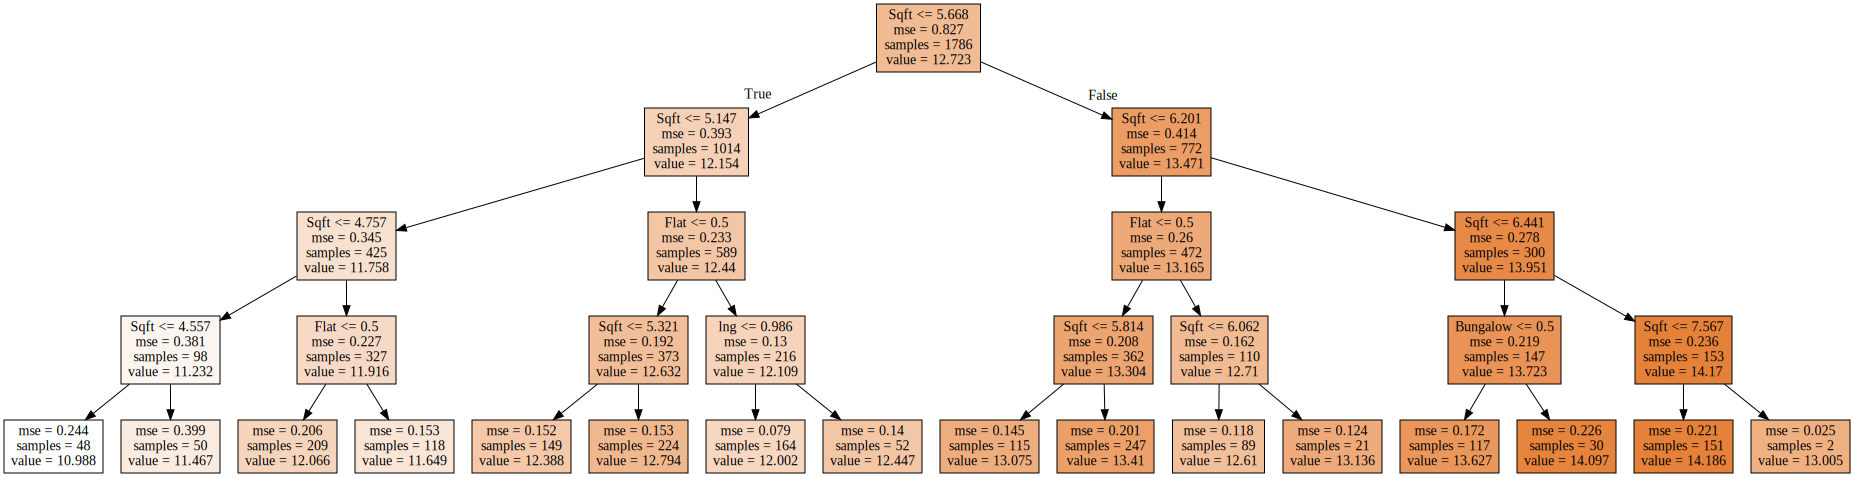

In [15]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=train_features.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 500, max_depth = 4, random_state = 42)

scores = (-cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1))
print('RMSE: %.2f (%.2f)' % (mean(scores), std(scores)))

rf.fit(train_features, train_labels)
r2 = (rf.score(test_features,test_labels))
print('R2:', r2)

predictions = rf.predict(test_features)
out_pred["pred_rf"] = np.exp(predictions)

out_pred[:200].to_csv("out_pred2.csv")

RMSE: 0.41 (0.03)
R2: 0.8301880447382968


<AxesSubplot:>

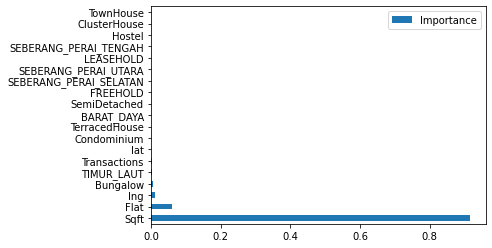

In [17]:
def feat_importance(m,df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df_train.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

importance = feat_importance(rf,train_features)
importance.plot(kind='barh')

In [18]:
#Discarding features with feature coefficients less than 0.01
to_keep = importance[importance['Importance'] > 0.01].index
train_features_keep = train_features[to_keep].copy()
test_features_keep = test_features[to_keep].copy()

# Fitting our Random Forest Model after discarding the less important features.
rf.fit(train_features_keep, train_labels)
print("RF R2: ", rf.score(test_features_keep,test_labels))

clf.fit(train_features_keep, train_labels)
print("CLF R2: ", clf.score(test_features_keep,test_labels))

dt.fit(train_features_keep, train_labels)
print("DT R2: ", dt.score(test_features_keep,test_labels))

RF R2:  0.8242436030343063
CLF R2:  0.8202426638745293
DT R2:  0.805159321114889
